# Curie-Weiss model (mean field Ising)
The Curie-Weiss (mean field) model is an Ising model with uniform ferromagnetic couplings. It features a paramagnetic-ferromagnetic phase transition.


It can be implemented in two ways:
- As a Boltzmann Machine with Spin (+/-1) variables and uniform couplings.
- As an RBM with Spin (+/-1) visible variables and a single Gaussian hidden unit with uniform weights

In [2]:
import sys
sys.path.append('../source/')
sys.path.append('../utilities/')
import numpy as np
import bm,rbm
from float_precision import curr_float,curr_int
import matplotlib.pyplot as plt
%matplotlib notebook

# Visualize magnetization distribution

<IPython.core.display.Javascript object>


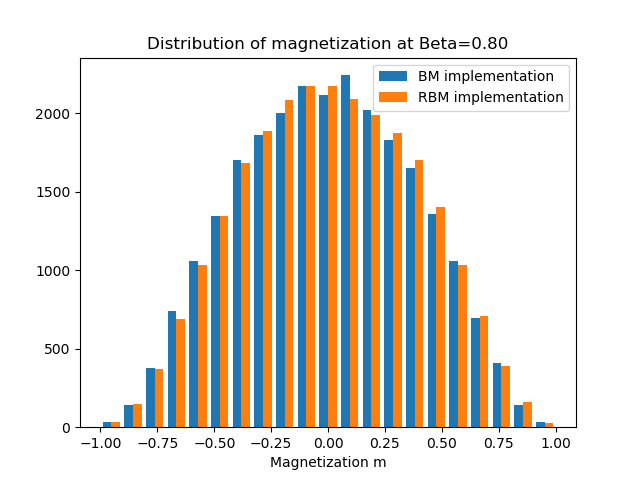

<IPython.core.display.Javascript object>


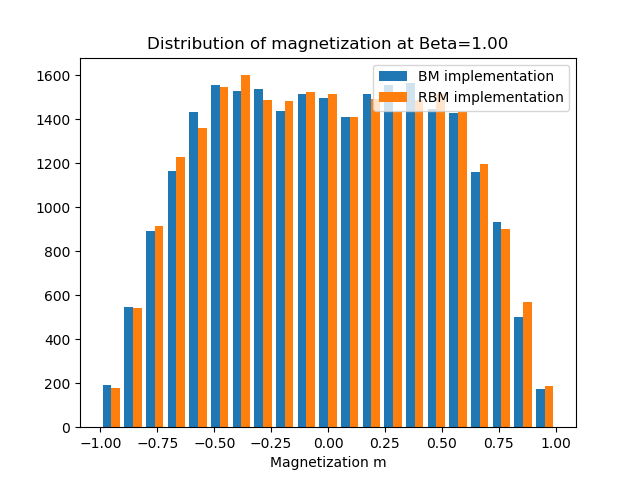

<IPython.core.display.Javascript object>


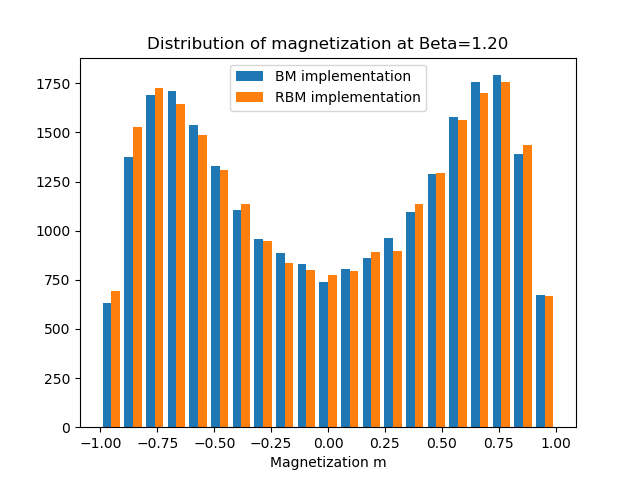

In [10]:
N = 20
for beta in [0.8,1.0,1.2]: 
    
    ## BM implementation.
    BM = bm.BM(N=N,nature='Spin')
    BM.layer.fields = np.zeros(N,dtype=curr_float)
    BM.layer.couplings = beta/N * np.ones([N,N],dtype=curr_float)
    BM.layer.couplings[np.arange(N),np.arange(N)] *=0 # Important: Must have zero diagonal.

    ## Gaussian RBM implementation.    
    RBM = rbm.RBM(n_v=N,n_h=1,visible='Spin',hidden='Gaussian')
    RBM.vlayer.fields = np.zeros(N,dtype=curr_float)
    RBM.hlayer.gamma = np.ones(1,dtype=curr_float)
    RBM.hlayer.theta = np.zeros(1,dtype=curr_float)
    RBM.weights = np.sqrt(beta/N) * np.ones([1,N],dtype=curr_float)

    configs = BM.gen_data(Nchains=5,Lchains=5000,Nstep=20,Nthermalize=1000)
    configs2,_ = RBM.gen_data(Nchains=5,Lchains=5000,Nstep=20,Nthermalize=1000)
    fig, ax = plt.subplots()
    plt.hist([configs.mean(-1),configs2.mean(-1)],bins=21);
    plt.title('Distribution of magnetization at Beta=%.2f'%beta)
    plt.xlabel('Magnetization m')
    plt.legend(['BM implementation','RBM implementation'])
    plt.show()

# Visualize one Markov chain

<IPython.core.display.Javascript object>


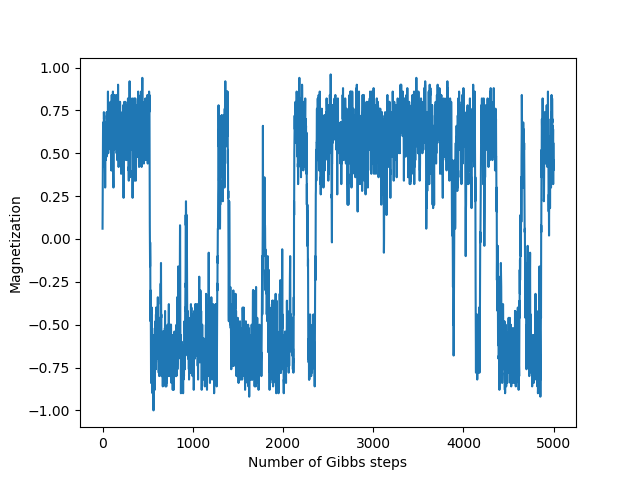

In [9]:
N = 100
beta = 1.2
RBM = rbm.RBM(n_v=N,n_h=1,visible='Spin',hidden='Gaussian')
RBM.vlayer.fields = np.zeros(N,dtype=curr_float)
RBM.hlayer.gamma = np.ones(1,dtype=curr_float)
RBM.hlayer.theta = np.zeros(1,dtype=curr_float)
RBM.weights = np.sqrt(beta/N) * np.ones([1,N],dtype=curr_float)

configs,_ = RBM.gen_data(Nchains=1,Lchains=5000,Nstep=1,Nthermalize=0,reshape=False)

magnetization = configs.mean(-1).T

fig, ax = plt.subplots()
plt.plot(magnetization)
plt.xlabel('Number of Gibbs steps')
plt.ylabel('Magnetization')
plt.show()